Finite automata are used to control simple, electronic devices like bedside lamps. DFA modeling remote control for a lamp with multiple modes: bright light for reading before bed, disco lights for when you're rocking out, dim light for the middle of the night, and off. The lamp is controlled by remote with an on/off switch and button for each setting. You can not transition from dim light or  to disco lights for obvious reasons.



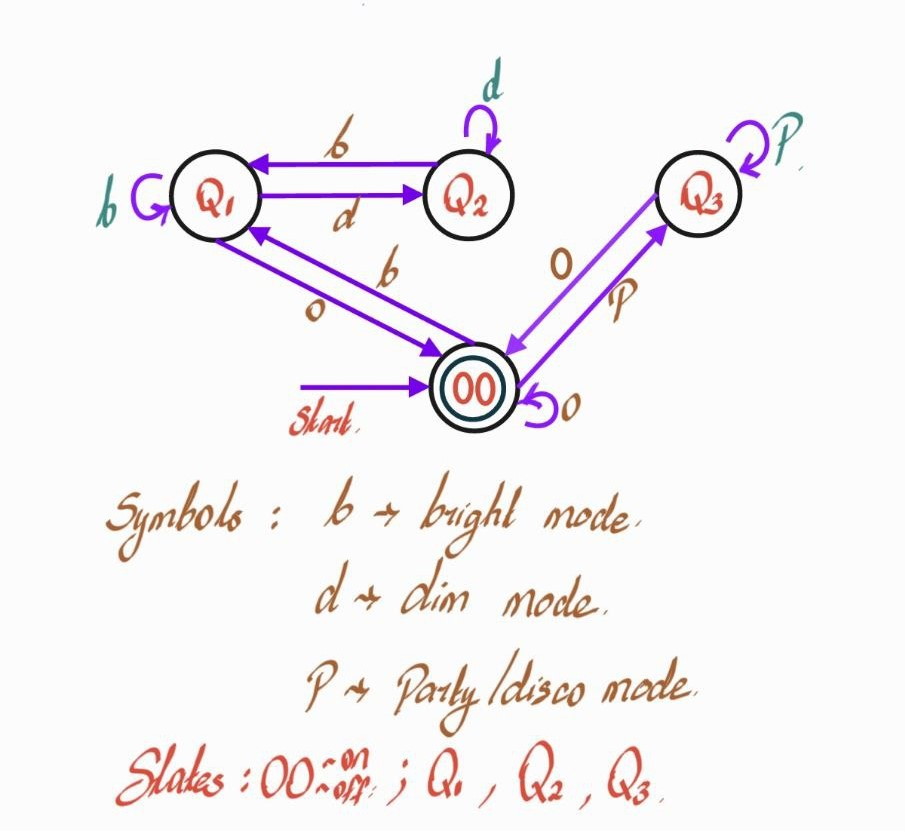

In [3]:
from IPython.display import Image

Image(filename='nite light.jpg')

In [2]:
#attributes required for a DFA object
#a simple structure to define the transition
#useful methods to include

#attributes required for a DFA object

#finite set of states
#Alphabet
#start state
#set of accept states
#transition function 
    #a simple structure to define the transition
    
#nested_dictionary

class State:
    def __init__(self, val):
        self.val = val
        self.links = []
    def add_link(self, link):
        self.links.append(link)
    def __str__(self):
        state = "(%s):\n" % self.val
        for link in self.links:
            state += "\t" + link + "\n"
        return state
    def __add__(self, other):
        return str(self) + other
    def __radd__(self, other):
        return other + str(self)
    def equals(self, state):
        ok = (self.val == state.val)
        if len(self.links) == len(state.links):
            for i in range(len(self.links)):
                ok = ok and (self.links[i] == state.links[i])
            return ok
        else:
            return False
        
class Function:
    def __init__(self, from_state, button, to_state):
        self.from_state = from_state
        self.button = button
        self.to_state = to_state
    def __str__(self):
        return "(%s --%s--> %s)" % (self.from_state.val, self.button, self.to_state.val)
    def __add__(self, other):
        return str(self) + other
    def __radd__(self, other):
        return other + str(self)
    def equals(self, link):
        return (self.from_state == link.from_state) and (self.button == link.button) and (self.to_state == link.to_state)

class Automata:
    def __init__(self, start_state, states, terminal_state):
        self.start_state = start_state
        self.states = states
        self.terminal_state = terminal_state
    def get_next_state(self, current_state, button):
        for link in current_state.links:
            if link.button == button:
                return link.to_state
        return None
    def accepts(self, string):
        state = self.start_state
        for character in string:
            state = self.get_next_state(state, character)
        return self.terminal_state.equals(state)
    def __str__(self):
        automata = "Initial state: %s\nTerminal state: %s\n" % (self.start_state.val, self.terminal_state.val)
        for state in self.states:
            automata += state
        return automata
    def __add__(self, other):
        return str(self) + other
    def __radd__(self, other):
        return other + str(self)
    
    
    if __name__ == '__main__':
        pass
    
    
on_off = State("OO")
bright = State("Q1")
dim = State("Q2")
disco = State("Q3")

#variables to show transitions
off_off = Function(on_off, 'o', on_off)
off_bright = Function(on_off, 'b', bright)
off_dim = Function(on_off, 'd', dim)
bright_bright = Function(bright, 'p', bright)
bright_dim = Function(bright, 'd', dim)
bright_off = Function(bright, 'o', on_off)
dim_bright = Function(dim, 'b',bright)
dim_dim = Function(dim, 'd', dim)
dim_off = Function(dim, 'o', on_off)
off_disco = Function(on_off, 'p', disco)
disco_disco = Function(disco, 'p', disco)
disco_off = Function(disco, 'o', on_off)



on_off.add_link(off_off)
on_off.add_link(off_bright)
on_off.add_link(off_dim)
on_off.add_link(off_disco)

bright.add_link(bright_bright)
bright.add_link(bright_dim)
bright.add_link(bright_off)


dim.add_link(dim_bright)
dim.add_link(dim_dim)
dim.add_link(dim_off)


disco.add_link(disco_off)
disco.add_link(disco_disco)

a = Automata(on_off, [on_off, bright, dim], on_off)
b = Automata(on_off, [on_off, bright, dim, disco], dim)


print(a)
print(a.accepts('b')) #True
print(a.accepts('o'))
print(b.accepts('ob'))
print(b.accepts('dbd'))
 

Initial state: OO
Terminal state: OO
(OO):
	(OO --o--> OO)
	(OO --b--> Q1)
	(OO --d--> Q2)
	(OO --p--> Q3)
(Q1):
	(Q1 --p--> Q1)
	(Q1 --d--> Q2)
	(Q1 --o--> OO)
(Q2):
	(Q2 --b--> Q1)
	(Q2 --d--> Q2)
	(Q2 --o--> OO)

False
True
False
True
